<a href="https://colab.research.google.com/github/ThantiwaChaimanee/AI-Intern/blob/Wa/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/carcolorclassification

/content/drive/.shortcut-targets-by-id/1_Xo5Bg-HZ69hJkuqrznYSN2uq5UTtq6N/carcolorclassification


In [ ]:
!ls

 car_color.onnx  'สำเนาของ color.ipynb'   color.ipynb   result	 yolov5


#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
%cd /content/drive/MyDrive/carcolorclassification/yolov5
!git clone https://github.com/ultralytics/yolov5  # clone repo

/content/drive/.shortcut-targets-by-id/1_Xo5Bg-HZ69hJkuqrznYSN2uq5UTtq6N/carcolorclassification/yolov5
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd /content/drive/MyDrive/carcolorclassification/yolov5
# !git fetch&git pull

%pip install -qr requirements.txt  # install dependencies
#%pip uninstall -y wandb 

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


# Create file dataset.yaml


In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/drive/MyDrive/carcolorclassification/yolov5/data/color/color.yaml
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/carcolorclassification/yolov5/data/color2/train
val: /content/drive/MyDrive/carcolorclassification/yolov5/data/color2/valid
test: /content/drive/MyDrive/carcolorclassification/yolov5/data/color2/test/images

# Classes
nc: 12
names: ['BLACK', 'BLUE', 'BROWN', 'GOLD', 'GREEN', 'GREY', 'ORANGE', 'PINK', 'PURPLE', 'RED', 'WHITE', 'YELLOW']

In [ ]:
%cat /content/drive/MyDrive/carcolorclassification/yolov5/data/color/color.yaml

# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: /content/drive/MyDrive/carcolorclassification/yolov5/data/color2/train
val: /content/drive/MyDrive/carcolorclassification/yolov5/data/color2/valid
test: /content/drive/MyDrive/carcolorclassification/yolov5/data/color2/test/images

# Classes
nc: 12
names: ['BLACK', 'BLUE', 'BROWN', 'GOLD', 'GREEN', 'GREY', 'ORANGE', 'PINK', 'PURPLE', 'RED', 'WHITE', 'YELLOW']

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.5 MB/s 
     |████████████████████████████████| 181 kB 69.0 MB/s 
     |████████████████████████████████| 145 kB 71.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=c99d73e6517e3db83bd6b868eaae898f6834a607c2fcb5c8b3b76f12fed0802d
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


# **Train**

### Model Small YOLOv5s
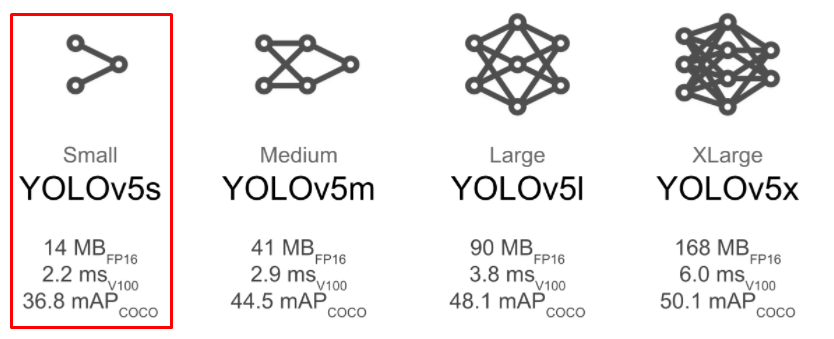

In [ ]:
import wandb
wandb.login()

In [ ]:
!python train.py --img 640 --batch 16 --epochs 150 --data /content/drive/MyDrive/Color/yolov5/data/color/color.yaml --weights yolov5s.pt --name add_black_white

wandb: Currently logged in as: mklxx. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Color/yolov5/data/color/color.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=add_black_white, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bi

# **test**

In [ ]:
!python detect.py --weights /content/drive/MyDrive/carcolorclassification/yolov5/runs/train/add_black_white/weights/best.pt --conf 0.75 --source /content/drive/MyDrive/carcolorclassification/yolov5/data/color2/test/images --save-txt

detect: weights=['/content/drive/MyDrive/carcolorclassification/yolov5/runs/train/add_black_white/weights/best.pt'], source=/content/drive/MyDrive/carcolorclassification/yolov5/data/color2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.75, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients
image 1/203 /content/drive/.shortcut-targets-by-id/1_Xo5Bg-HZ69hJkuqrznYSN2uq5UTtq6N/carcolorclassification/yolov5/data/color2/test/images/65001000240_001_jpeg.rf.3563eda9b05816f0675c55261bb3c383.jpg: 480x640 1 WHITE, Done. (0.017s)
image 2/203 /content/drive/.short

# Export to ONNX

In [ ]:
%cd /content/drive/MyDrive/Color/yolov5
!pip install -r requirements.txt  # base requirements
!pip install coremltools>=4.1 onnx>=1.9.0 scikit-learn==0.19.2  # export requirements

/content/drive/MyDrive/Color/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.19.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.19.2 which is incompatible.


In [ ]:
!python export.py --include onnx --weights /content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights/best.pt --img 640 --batch 1 

export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.11.0+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from /content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights/best.pt with output shape (1, 25200, 17) (13.7 MB)

ONNX: starting export with onnx 1.11.0...
ONNX: export success, saved as /content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights/best.onnx (27.3 MB)

Export complete (3.26s)
Results saved to /content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights
Detect:          pyt

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights/best.onnx --conf 0.50 --source /content/drive/MyDrive/Color/yolov5/data/color2/test/images

detect: weights=['/content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights/best.onnx'], source=/content/drive/MyDrive/Color/yolov5/data/color2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-143-g6ea81bb torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Loading /content/drive/MyDrive/Color/yolov5/runs/train/add_black_white/weights/best.onnx for ONNX Runtime inference...
image 1/199 /content/drive/MyDrive/Color/yolov5/data/color2/test/images/65001000024_002_jpeg.rf.0038f66826cfd5d52f8d351805970766.jpg: 640x640 1 BLACK, Done. (0.016s)
image 2/199 /content/drive/MyDrive/Color/yolov5/data/color2/test/images/65001000240_001_jp